Analysis of an E-commerce DatasetB

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
ds = 'The E-commerce Dataset.csv'
df = pd.read_csv(ds)
display(df)
print(df.shape)

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


(20000, 11)


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       20000 non-null  int64  
 1   timestamp    20000 non-null  int64  
 2   review       20000 non-null  object 
 3   item         20000 non-null  object 
 4   rating       19983 non-null  float64
 5   helpfulness  19978 non-null  float64
 6   gender       19973 non-null  object 
 7   category     20000 non-null  object 
 8   item_id      20000 non-null  int64  
 9   item_price   20000 non-null  float64
 10  user_city    20000 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.7+ MB


In [86]:
df2 = df.isnull().sum()
print (df2)
df2.shape
df_clean = df.dropna()
df_clean.shape

userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64


(19934, 11)

In [87]:
print('the length before removing missing data is ', len(df))
print('the length after removing missing data is ', len(df2))
print('the length after removing missing data is ', len(df_clean))

the length before removing missing data is  20000
the length after removing missing data is  11
the length after removing missing data is  19934


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [88]:
#Q2.1

user_array = df_clean['userId'].unique()
print('Total unique users are ', user_array.size)

review_array = df_clean['review'].unique()
print('Total of unique review are ',review_array.size)

item_array = df_clean['item'].unique()
print('Total of unique item are ', item_array.size)

category_array = df_clean['category'].unique()
print('Total unique category are ', category_array.size)

Total unique users are  8565
Total of unique review are  19460
Total of unique item are  89
Total unique category are  9


In [89]:
df_clean['rating'].describe()

count    19934.000000
mean         3.701415
std          1.404546
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [90]:
#Q2.2

df_clean['rating'].describe()

count    19934.000000
mean         3.701415
std          1.404546
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [91]:
#Q2.3

gender_num = df_clean.groupby(['gender'])['item'].count().reset_index(name='count')
gender_num.head()


,gender,count
0,F,9799
1,M,10135


In [92]:
gender_num['count'].describe()

count        2.000000
mean      9967.000000
std        237.587878
min       9799.000000
25%       9883.000000
50%       9967.000000
75%      10051.000000
max      10135.000000
Name: count, dtype: float64

In [93]:
#Q2.4
rated_num = df_clean.groupby(['item'])['rating'].count().reset_index(name='count')
rated_num.head()

,item,count
0,AOL (America Online),941
1,All Advantage,657
2,Alta Vista (by 1stUp),157
3,Amazon.com,240
4,American Airlines,185


In [94]:
rated_num['count'].describe()

count     89.000000
mean     223.977528
std      116.608511
min      139.000000
25%      162.000000
50%      187.000000
75%      245.000000
max      941.000000
Name: count, dtype: float64

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Books'),
  Text(2, 0, 'Games'),
  Text(3, 0, 'Hotels & Travel'),
  Text(4, 0, 'Kids & Family'),
  Text(5, 0, 'Media'),
  Text(6, 0, 'Movies'),
  Text(7, 0, 'Online Stores & Services'),
  Text(8, 0, 'Personal Finance'),
  Text(9, 0, 'Restaurants & Gourmet')])

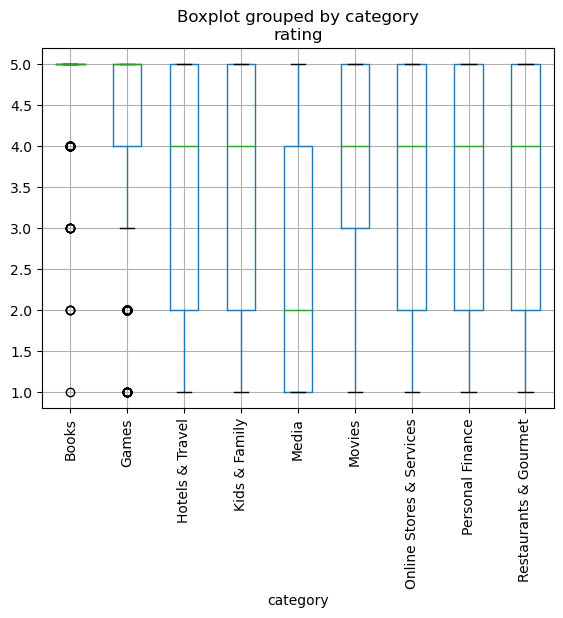

In [97]:
df_clean.boxplot("rating", by="category")
plt.xticks(rotation=90)

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [108]:
# the reviews of which the helpfulness is no more than 2
remove_outlier_df = df_clean.drop(df_clean.index[(df_clean['helpfulness'] <= 2)])
print('the length of data after removing outlier helpfulness ', len(remove_outlier_df))

the length of data after removing outlier helpfulness  13658


In [109]:
# group users by their ids and count the number of their ratings 
group_user_df = remove_outlier_df.groupby(['userId'])['rating'].count().reset_index(name= 'count')
print('the number of user after removing outlier helpfulness', len(group_user_df))

the number of user after removing outlier helpfulness 6541


In [110]:
group_user_df.head()

,userId,count
0,0,3
1,1,1
2,2,2
3,3,2
4,4,7


In [111]:
# get the ids of users who have rated no less than 7 items
userIds = group_user_df[group_user_df['count'] >= 7]['userId'].tolist()
print(len(userIds))

268


In [112]:
# filter users who have rated less than 7 items
remove_outlier_df = remove_outlier_df[remove_outlier_df['userId'].isin(userIds)]

In [113]:
print('the length of data is', len(remove_outlier_df))

the length of data is 2752


In [115]:
# group items by their names and count the number of their ratings 
group_user_df = remove_outlier_df.groupby(['item'])['rating'].count().reset_index(name= 'count')
group_user_df.head()

,item,count
0,AOL (America Online),94
1,All Advantage,73
2,Alta Vista (by 1stUp),10
3,Amazon.com,18
4,American Airlines,19


In [118]:
# get the names of items that have received no less than 11 ratings
items = group_user_df[group_user_df['count'] >= 11]['item'].tolist()
print(len(items))

82


In [119]:
# filter items that have received less than 11 ratings
remove_outlier_df = remove_outlier_df[remove_outlier_df['item'].isin(items)]
len(remove_outlier_df)

2696

In [120]:
# export the processed data as csv file
remove_outlier_df.to_csv('A combined dataset from ecommerce dataset_cleaned_data.csv', index=False)